## Wrangle and Analyze Data



## Table of Contents
- [Data Gathering](#gath)
- [Data Assessing](#assess)
- [Data Cleaning](#clean)
- [Data Storing](#storing)
- [Data Analysis and Visualization](#vis)






<a id='gath'></a>
### Data Gathering

We have 3 sources of data that we're gonna use:

1- Twitter_Archieve_Enhanced csv file

2-Twitter API

3- Udacity Image Prediction Program

In [1]:
#importing all the required libraries
"""
import numpy as np
import pandas as pd
import tweepy
import os
import matplotlib.pyplot as pt
import seaborn as sea
import os
import requests
from tweepy import OAuthHandler
from timeit import default_timer as timer
import json
"""
import pandas as pd
import numpy as np
import requests 
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Data Source 1
df1=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Data Source 2
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
req=requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(req.content)
    
df2=pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
# Data Source 3
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
""""
These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict) 
No access was granted from Udacity
""""" 

'"\nThese are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \'HIDDEN\'\nconsumer_secret = \'HIDDEN\'\naccess_token = \'HIDDEN\'\naccess_secret = \'HIDDEN\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_1.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON a

In [5]:
jdata = []
with open('tweet-json.txt') as jtweet:
    jsont = jtweet.readlines()
    for json_line in jsont:
        tweet = json.loads(json_line)
        tid = tweet['id']
        ret_c = tweet['retweet_count']
        fav_c = tweet['favorite_count']
        text = tweet['full_text']
        cre_date = tweet['created_at']
        t_sor = tweet['source']
        
        jdata.append([tid,ret_c,fav_c,text,cre_date,t_sor])
df3 = pd.DataFrame()
df3 = df3.append(jdata).rename(columns={0:'tweet_id', 1:'retweets', 2:'favorites', 3:'Text', 4:'CrateDate', 5:'Source'})

<a id='assess'></a>
### Data Assessing


In [6]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df1.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
df1['tweet_id'].duplicated().sum()

0

In [10]:
df1.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Penny         10
Lola          10
Tucker        10
Winston        9
Bo             9
Sadie          8
the            8
Toby           7
Buddy          7
an             7
Bailey         7
Daisy          7
Dave           6
Leo            6
Oscar          6
Rusty          6
Scout          6
Jax            6
Stanley        6
Koda           6
Bella          6
Milo           6
Jack           6
George         5
            ... 
Carbon         1
Liam           1
Clarq          1
Harvey         1
Amélie         1
Bowie          1
Puff           1
Amy            1
Geoff          1
Farfle         1
Arya           1
Kirk           1
Rodman         1
Lipton         1
Halo           1
Darla          1
Henry          1
Simba          1
Skittles       1
Kathmandu      1
Rooney         1
Bobby          1
Anna           1
Pippin         1
Erik           1
Boston         1
Rudy           1
Ricky         

In [11]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

We can see that we have a missing values in the following attributes (in_reply_to_status_id , in_reply_to_user_id ,expanded_urls ,retweeted_status_id ,retweeted_status_user_id ,retweeted_status_timestamp)
Also, the type for in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) should be treated as string to avoid calculation. And the type of timestamp retweeted_status_timestamp should be datetime instead of object.
And we can see some mistake values in rating_numerator , the maximum of the rating should be 10

In [12]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
df2['tweet_id'].duplicated().sum()

0

The type of tweet id should be object.

In [15]:
df3.head()

,tweet_id,retweets,favorites,Text,CrateDate,Source
0,892420643555336193,8853,39467,This is Phineas. He's a mystical boy. Only eve...,Tue Aug 01 16:23:56 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
1,892177421306343426,6514,33819,This is Tilly. She's just checking pup on you....,Tue Aug 01 00:17:27 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
2,891815181378084864,4328,25461,This is Archie. He is a rare Norwegian Pouncin...,Mon Jul 31 00:18:03 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
3,891689557279858688,8964,42908,This is Darla. She commenced a snooze mid meal...,Sun Jul 30 15:58:51 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."
4,891327558926688256,9774,41048,This is Franklin. He would like you to stop ca...,Sat Jul 29 16:00:24 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r..."


In [16]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 6 columns):
tweet_id     2354 non-null int64
retweets     2354 non-null int64
favorites    2354 non-null int64
Text         2354 non-null object
CrateDate    2354 non-null object
Source       2354 non-null object
dtypes: int64(3), object(3)
memory usage: 110.4+ KB


The type of CrateDate should be datetime. 

## Tidiness

Since all data have a tweet_id, we can merge the dataframes to allow easier analysis. And we should replace the dog stages columns with one column that define the stage

<a id='clean'></a>
### Data Cleaning






After assessing the data, we have to clean it by eiter deleting urequired data or modifying it.

In [17]:
#Making copies of all dataframes
ndf1=df1.copy()
ndf2=df2.copy()
ndf3=df3.copy()

#### Define
Remove data with missing values (Quality Issue)

#### Code

In [18]:
# Remove missing values
ndf1 = ndf1[pd.isnull(ndf1['retweeted_status_user_id'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Test

In [ ]:
ndf1.head()

#### Define
Delete column that we wont need using (Quality Issue)

#### Code

In [19]:
# Delete unrequired columns
ndf1 = ndf1.drop('in_reply_to_status_id',1)
ndf1 = ndf1.drop('in_reply_to_user_id',1)
ndf1 = ndf1.drop('expanded_urls',1)
ndf1 = ndf1.drop('retweeted_status_user_id',1)
ndf1 = ndf1.drop('retweeted_status_timestamp',1)

#### Test

In [ ]:
ndf1.head()

#### Define
Change the datatype of data (Quality Issue)

#### Code

In [20]:
# Change the data type of timestamp
ndf1.timestamp = pd.to_datetime(ndf1.timestamp)

#### Test

In [ ]:
ndf1.head()

#### Define
Alter tha value of ratings to be out of 10 (Quality Issue)

#### Code

In [21]:
# Alter the values of ratings to be out 10
ndf1['rating1'] = 10*ndf1['rating_numerator'] / ndf1['rating_denominator']


In [22]:
# Create a funcition that ensure the rating is out of 10
def Rate(x):
    if x >=10:
        return 10
    if x < 10:
        return x

In [23]:
ndf1['rating2']= ndf1['rating1'].apply(Rate)
ndf1['rating2']=ndf1['rating2'].astype(int)
ndf1.rating2.value_counts()

10    1742
9      156
8       99
7       54
5       37
6       33
3       19
4       15
2       11
1        7
0        2
Name: rating2, dtype: int64

#### Test

In [ ]:
ndf1.head()

#### Define
Replace special Characters (Quality Issue)

#### Code

In [24]:
# Replace special characters 
ndf1["source"] = ndf1["source"].str.replace(r'<(?:a\b[^>]*>|/a>)', '')


#### Test

In [ ]:
ndf1.head()

#### Define
Remove incorrrect names in the name column (Quality Issue)

#### Code

In [25]:
# Create a function that replace incorrect names with None
def change_name(tweet):
    if tweet['name'][0].islower() == True:
        return 'None'
    else:
        return tweet['name']
    


In [26]:
ndf1['name'] = ndf1.apply(change_name, axis = 1)

#### Test

In [ ]:
ndf1.head()

#### Define
Change the datatype of crateDate (Quality Issue)

#### Code

In [27]:
ndf3.CrateDate = pd.to_datetime(ndf3.CrateDate)

#### Test

In [ ]:
ndf3.head()

## Tideness

In [28]:
#Merge image prediction and Twitter Archive
merged = pd.merge(ndf1, ndf2, on=['tweet_id'], how = 'inner')
merged.head()

,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,13,10,Darla,None,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,12,10,Franklin,None,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [29]:
# Merge the stages columns to one type column
merged['stage'] = merged['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)


In [30]:
merged = merged.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'])

In [31]:
#Merge with the third dataset
master = pd.merge(merged, ndf3, on=['tweet_id'], how = 'inner')


<a id='storing'></a>
### Data Storing



In [32]:
#Save the dataset to CSV file
master.to_csv('master_tweets.csv', index=False)



<a id='vis'></a>
### Data Analysis and Visualizatio

### Ratings vs. Dogs Stages

(5, 15)

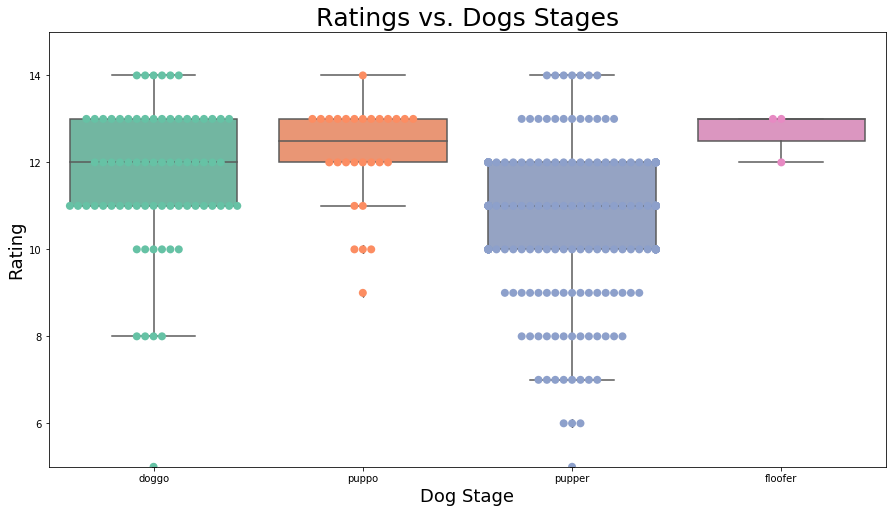

In [33]:
plt.figure(figsize=(15,8))
X = master[master.stage.notnull()]
sns.swarmplot(x="stage", y="rating1", data=X, size=8, palette="Set2")
sns.boxplot(x="stage", y="rating1", data=X , palette="Set2")
plt.title("Ratings vs. Dogs Stages", size=25)
plt.xlabel('Dog Stage', fontsize=18)
plt.ylabel('Rating', fontsize=18);
plt.ylim(5, 15)

We can see value distribution of rating for each stage of dogs.

### Sources Used

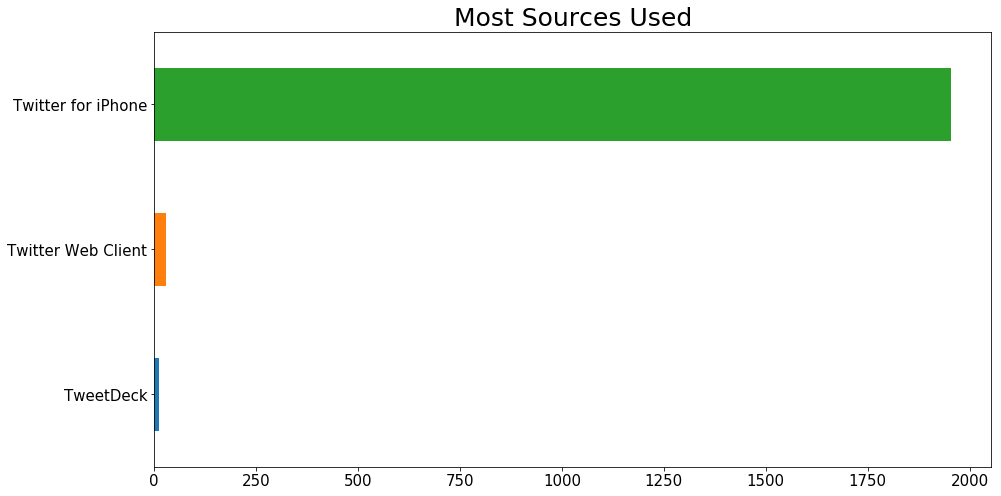

In [109]:
# The most Sources Used
plt.figure(figsize=(15,8))
plt.title("Most Sources Used", size=25)
master['source'].value_counts()[10::-1].plot(kind='barh',fontsize=15);

We can see from the graph above that most source that was used is Twitter for iPhone.

### Number of dogs per Stage

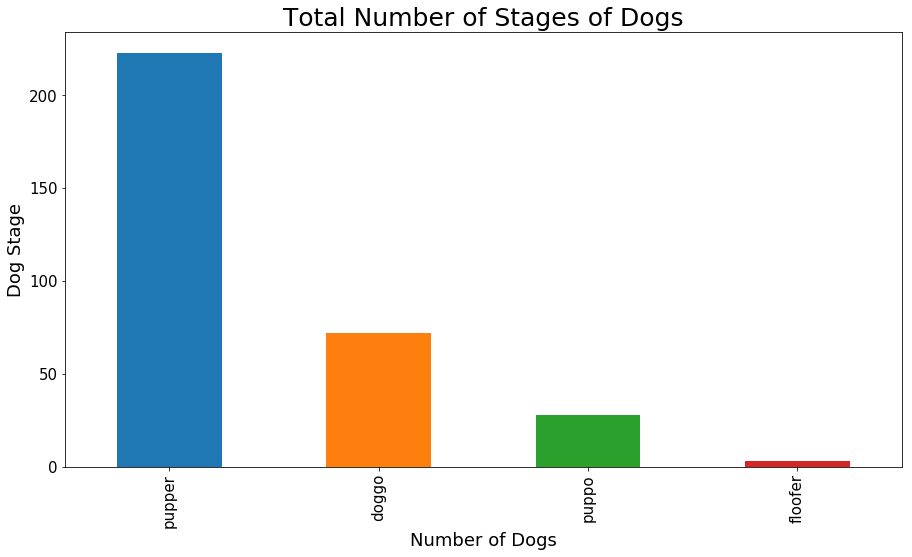

In [108]:
plt.figure(figsize=(15,8))
plt.title("Total Number of Stages of Dogs", size=25)
plt.ylabel("Dog Stage", size=18)
plt.xlabel("Number of Dogs", size=18)
master.stage.value_counts().plot(kind='bar', fontsize=15);

We can see from the bar chart above, that the most number of dogs is the pupper stage.